## Notebook demonstrating how to identify experiments, sessions, containers, or mice of interest using LIMS BehaviorProjectCache and associated VBA filtering functions 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Table of Contents

1. [Experiments table](#expts_table)<br>
    1.1 [Get list of experiments from BehaviorProjectCache](#bpc)<br>
    1.2 [Get experiments that are in the data release](#release_expts)<br>
2. Container level view


## 1. Experiments table
<a id='expts_table'></a>

### 1.1 Get list of experiments from BehaviorProjectCache
<a id='bpc'></a>

<code>BehaviorProjectCache.get_experiment_table()</code> currently returns a list of ophys data from lims, for a variety of project codes, regardless of QC state. This is the maximally inclusive all encompasing list, including failed data and very recently collected data. 

In [3]:
from allensdk.brain_observatory.behavior.behavior_project_cache import BehaviorProjectCache

In [4]:
cache = BehaviorProjectCache.from_lims()
all_experiments = cache.get_experiment_table()

print(len(all_experiments))

Getting all ophys sessions. This might take a while.


4449


In [5]:
all_experiments.project_code.unique()

array(['VisualBehaviorMultiscope', 'VisualBehavior',
       'VisBIntTestDatacube', 'VisualBehaviorTask1B',
       'MultiscopeSignalNoise', 'VisualBehaviorMultiscope4areasx2d',
       'VisualBehaviorIntegrationTest'], dtype=object)

In [6]:
all_experiments.experiment_workflow_state.unique()

array(['passed', 'failed', 'qc', 'created'], dtype=object)

In [7]:
all_experiments.keys()

Index(['ophys_session_id', 'behavior_session_id', 'container_id',
       'project_code', 'container_workflow_state', 'experiment_workflow_state',
       'session_name', 'session_type', 'equipment_name', 'date_of_acquisition',
       'isi_experiment_id', 'specimen_id', 'donor_id', 'sex', 'age_in_days',
       'full_genotype', 'mouse_id', 'reporter_line', 'driver_line',
       'imaging_depth', 'targeted_structure', 'published_at'],
      dtype='object')

## 2. Get experiments that are in the data release using VBA <code>get_filtered_ophys_dataset()</code>
<a id='release_expts'></a>

To limit to release experiments only, use VBA function to restrict to experiments that have passed QC from relevant project codes. This function loads from a previously cached file, so that the dataset used for analysis is stable and consistent across users. 

https://github.com/AllenInstitute/visual_behavior_analysis/blob/master/visual_behavior/data_access/loading.py#L130

In [8]:
import visual_behavior.data_access.loading as loading

In [9]:
experiments = loading.get_filtered_ophys_experiment_table(release_data_only=True)
print('there are', len(experiments), 'experiments in the release')

there are 1109 experiments in the release


In [10]:
experiments.head()

,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,...,super_container_id,cre_line,session_tags,failure_tags,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,model_outputs_available,location,session_number
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980471,951410079,951520319,1018028342,VisualBehaviorMultiscope,published,passed,20190920_457841_1imagesA_2,OPHYS_1_images_A,MESO.1,2019-09-20 09:45:29.897856,...,850862430,Sst-IRES-Cre,NaN,NaN,0,65.0,0.0,False,Sst_VISp_150,1
951980475,951410079,951520319,1018028339,VisualBehaviorMultiscope,published,passed,20190920_457841_1imagesA_2,OPHYS_1_images_A,MESO.1,2019-09-20 09:45:29.897856,...,850862430,Sst-IRES-Cre,NaN,NaN,0,65.0,0.0,False,Sst_VISp_75,1
951980486,951410079,951520319,1018028360,VisualBehaviorMultiscope,published,passed,20190920_457841_1imagesA_2,OPHYS_1_images_A,MESO.1,2019-09-20 09:45:29.897856,...,850862430,Sst-IRES-Cre,NaN,NaN,0,65.0,0.0,False,Sst_VISl_300,1
951980479,951410079,951520319,1018028354,VisualBehaviorMultiscope,published,passed,20190920_457841_1imagesA_2,OPHYS_1_images_A,MESO.1,2019-09-20 09:45:29.897856,...,850862430,Sst-IRES-Cre,NaN,NaN,0,65.0,0.0,False,Sst_VISl_150,1
951980481,951410079,951520319,1018028357,VisualBehaviorMultiscope,published,passed,20190920_457841_1imagesA_2,OPHYS_1_images_A,MESO.1,2019-09-20 09:45:29.897856,...,850862430,Sst-IRES-Cre,NaN,NaN,0,65.0,0.0,False,Sst_VISl_225,1


In [11]:
experiments.project_code.unique()

array(['VisualBehaviorMultiscope', 'VisualBehaviorTask1B',
       'VisualBehavior'], dtype=object)

In [12]:
experiments.experiment_workflow_state.unique()

array(['passed'], dtype=object)

In [13]:
# this table also includes a few extra useful columns
experiments.keys()

Index(['ophys_session_id', 'behavior_session_id', 'container_id',
       'project_code', 'container_workflow_state', 'experiment_workflow_state',
       'session_name', 'session_type', 'equipment_name', 'date_of_acquisition',
       'isi_experiment_id', 'specimen_id', 'donor_id', 'sex', 'age_in_days',
       'full_genotype', 'mouse_id', 'reporter_line', 'driver_line',
       'imaging_depth', 'targeted_structure', 'published_at',
       'super_container_id', 'cre_line', 'session_tags', 'failure_tags',
       'prior_exposures_to_session_type', 'prior_exposures_to_image_set',
       'prior_exposures_to_omissions', 'model_outputs_available', 'location',
       'session_number'],
      dtype='object')

### Describe the dataset - how many mice, containers, sessions, and experiments are there for each project?

In [14]:
n_mice = experiments.groupby(['project_code', 'cre_line', 'mouse_id']).count().reset_index().groupby(['project_code','cre_line']).count()[['mouse_id']].rename(columns={'mouse_id':'# mice'})
n_containers = experiments.groupby(['project_code', 'cre_line', 'container_id']).count().reset_index().groupby(['project_code','cre_line']).count()[['container_id']].rename(columns={'container_id':'# containers'})
n_sessions = experiments.groupby(['project_code', 'cre_line', 'ophys_session_id']).count().reset_index().groupby(['project_code','cre_line']).count()[['ophys_session_id']].rename(columns={'ophys_session_id':'# sessions'})
n_experiments = experiments.groupby(['project_code', 'cre_line', 'ophys_experiment_id']).count().reset_index().groupby(['project_code','cre_line']).count()[['ophys_experiment_id']].rename(columns={'ophys_experiment_id':'# experiments'})

dataset = n_mice.merge(n_containers, on=['project_code', 'cre_line'])
dataset = dataset.merge(n_sessions, on=['project_code', 'cre_line'])
dataset = dataset.merge(n_experiments, on=['project_code', 'cre_line'])
for i, column in enumerate(dataset.columns):
    dataset.at[('Total', ''),column] = int(dataset.sum()[i])
dataset = dataset.apply(pd.to_numeric, downcast='integer')
dataset

# mice  # containers  # sessions  \
project_code             cre_line                                              
VisualBehavior           Slc17a7-IRES2-Cre      17            17         103   
                         Sst-IRES-Cre            4             4          26   
                         Vip-IRES-Cre            7             7          46   
VisualBehaviorMultiscope Slc17a7-IRES2-Cre       6            42          43   
                         Sst-IRES-Cre            4            23          30   
                         Vip-IRES-Cre            9            56          60   
VisualBehaviorTask1B     Slc17a7-IRES2-Cre      14            14          95   
                         Sst-IRES-Cre            7             7          50   
                         Vip-IRES-Cre            6             6          42   
Total                                           74           176         495   

                                            # experiments  
project_code             cre_line                          
VisualBehavior           Slc17a7-IRES2-Cre            103  
                         Sst-IRES-Cre                  26  
                         Vip-IRES-Cre                  46  
VisualBehaviorMultiscope Slc17a7-IRES2-Cre            265  
                         Sst-IRES-Cre                 149  
                         Vip-IRES-Cre                 333  
VisualBehaviorTask1B     Slc17a7-IRES2-Cre             95  
                         Sst-IRES-Cre                  50  
                         Vip-IRES-Cre                  42  
Total                                                1109

### Get all Vip experiments

In [15]:
vip_experiments = experiments[(experiments.cre_line=='Vip-IRES-Cre')]
print(len(vip_experiments))

421


In [16]:
vip_experiments.head()

,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,...,super_container_id,cre_line,session_tags,failure_tags,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,model_outputs_available,location,session_number
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
792815735,792619807,792680306,791352433,VisualBehavior,published,passed,20181210_412036_1imagesA,OPHYS_1_images_A,CAM2P.4,2018-12-10 21:19:50.000000,...,744911458,Vip-IRES-Cre,NaN,NaN,0,19.0,1.0,True,Vip_VISp_175,1
795073741,794918442,794968300,791352433,VisualBehavior,published,passed,20181213_412036_3imagesA,OPHYS_3_images_A,CAM2P.4,2018-12-13 21:11:17.000000,...,744911458,Vip-IRES-Cre,NaN,NaN,0,21.0,3.0,True,Vip_VISp_175,3
795953296,795625712,795742990,791352433,VisualBehavior,published,passed,20181214_412036_4imagesB,OPHYS_4_images_B,CAM2P.4,2018-12-14 20:17:05.000000,...,744911458,Vip-IRES-Cre,NaN,NaN,0,0.0,4.0,True,Vip_VISp_175,4
796108483,796044280,796052844,791352433,VisualBehavior,published,passed,20181215_412036_5imagesB,OPHYS_5_images_B_passive,CAM2P.4,2018-12-15 20:56:37.000000,...,744911458,Vip-IRES-Cre,NaN,NaN,0,1.0,5.0,False,Vip_VISp_175,5
796308505,796236521,796251270,791352433,VisualBehavior,published,passed,20181216_412036_6imagesB,OPHYS_6_images_B,CAM2P.4,2018-12-16 20:44:48.000000,...,744911458,Vip-IRES-Cre,NaN,NaN,0,2.0,6.0,True,Vip_VISp_175,6


### Get Vip containers that have a session that is the first exposure to a novel image set

In [17]:
vip_containers_with_novelty = vip_experiments[vip_experiments.prior_exposures_to_image_set==0]
vip_container_ids_with_novelty = vip_containers_with_novelty.container_id.unique()

print('there are', len(vip_container_ids_with_novelty), 'containers with a novel image set exposure')
print('\n')
print('container_ids: ',vip_container_ids_with_novelty)

there are 47 containers with a novel image set exposure


container_ids:  [ 791352433  825183217  957570596 1046576791 1046576787 1046576772
 1046576775 1046576784 1046576794  969421516  929913236 1026722876
 1026722873 1026722861 1026722854 1026722858 1064333322 1064333290
 1051327176  991913246 1018027853 1018027847 1018027865 1018027859
 1018027868 1018027862 1022731547 1022731524 1022731527 1022731531
 1022731544 1022731540 1000740410 1000740620 1018027593 1018027602
 1018027611 1018027608 1018027615 1018027605 1018027599 1018028172
 1018028169 1018028166 1018028185 1018028182 1018028188]


### In what order were the sessions for these containers collected? 

#### Let's look at the data from a container view

VBA function <code>build_container_df()</code> rearranges the experiment table to organize data by container_id

https://github.com/AllenInstitute/visual_behavior_analysis/blob/master/visual_behavior/data_access/loading.py#L2009

In [18]:
containers = loading.build_container_df(experiments)

In [19]:
containers.head()

,project_code,mouse_id,sex,age_in_days,full_genotype,cre_line,targeted_structure,imaging_depth,first_acquisition_date,equipment_name,...,session_1,session_2,session_3,session_4,session_5,session_6,session_7,session_8,session_9,session_10
container_id,,,,,,,,,,,,,,,,,,,,,
1064333322,VisualBehavior,544261,F,126.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,175,2020-11-23,[CAM2P.4],...,OPHYS_3_images_A experiment_id:1067133175,OPHYS_4_images_B experiment_id:1067647876,OPHYS_5_images_B_passive experiment_id:1069286458,OPHYS_6_images_B experiment_id:1071070929,OPHYS_6_images_B experiment_id:1071440875,NaN,NaN,NaN,NaN,NaN
1064333290,VisualBehavior,538219,F,165.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,175,2020-11-23,[CAM2P.3],...,OPHYS_1_images_A experiment_id:1065966776,OPHYS_2_images_A_passive experiment_id:1066177684,OPHYS_3_images_A experiment_id:1067133170,OPHYS_4_images_B experiment_id:1067648397,OPHYS_5_images_B_passive experiment_id:1068173247,OPHYS_6_images_B experiment_id:1069286452,NaN,NaN,NaN,NaN
1058209392,VisualBehaviorTask1B,539518,F,128.0,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,Slc17a7-IRES2-Cre,VISp,375,2020-10-27,[CAM2P.4],...,OPHYS_2_images_B_passive experiment_id:1059768347,OPHYS_3_images_B experiment_id:1059963010,OPHYS_3_images_B experiment_id:1060184782,OPHYS_4_images_A experiment_id:1060759278,OPHYS_5_images_A_passive experiment_id:1061327688,OPHYS_6_images_A experiment_id:1061787719,NaN,NaN,NaN,NaN
1054675423,VisualBehaviorTask1B,539517,M,113.0,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,Slc17a7-IRES2-Cre,VISp,175,2020-10-12,[CAM2P.3],...,OPHYS_3_images_B experiment_id:1056561863,OPHYS_2_images_B_passive experiment_id:1057070365,OPHYS_4_images_A experiment_id:1057706462,OPHYS_5_images_A_passive experiment_id:1057956396,OPHYS_4_images_A experiment_id:1058275574,OPHYS_4_images_A experiment_id:1058813457,OPHYS_6_images_A experiment_id:1059340828,NaN,NaN,NaN
1052096570,VisualBehaviorMultiscope,528097,F,167.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISl,225,2020-09-22,[MESO.1],...,OPHYS_2_images_A_passive experiment_id:1052412568,OPHYS_3_images_A experiment_id:1052637596,OPHYS_6_images_B experiment_id:1057725806,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### look at containers with a novel image session that was not a retake

In [20]:
# scroll to the right to see session order 
# reminder this is only passing experiments
novel_vip_containers = containers.loc[vip_container_ids_with_novelty]
novel_vip_containers.head()

,project_code,mouse_id,sex,age_in_days,full_genotype,cre_line,targeted_structure,imaging_depth,first_acquisition_date,equipment_name,...,session_1,session_2,session_3,session_4,session_5,session_6,session_7,session_8,session_9,session_10
container_id,,,,,,,,,,,,,,,,,,,,,
791352433,VisualBehavior,412036,F,148.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,175,2018-12-10,[CAM2P.4],...,OPHYS_3_images_A experiment_id:795073741,OPHYS_4_images_B experiment_id:795953296,OPHYS_5_images_B_passive experiment_id:796108483,OPHYS_6_images_B experiment_id:796308505,OPHYS_2_images_A_passive experiment_id:798404219,NaN,NaN,NaN,NaN,NaN
825183217,VisualBehavior,429952,M,131.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,175,2019-02-20,[CAM2P.4],...,OPHYS_4_images_B experiment_id:830093338,OPHYS_5_images_B_passive experiment_id:830700800,OPHYS_6_images_B experiment_id:832115263,OPHYS_6_images_B experiment_id:833631914,OPHYS_3_images_A experiment_id:836258957,OPHYS_2_images_A_passive experiment_id:836911939,NaN,NaN,NaN,NaN
957570596,VisualBehaviorTask1B,467953,M,177.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,175,2019-10-10,[CAM2P.4],...,OPHYS_2_images_B_passive experiment_id:967008454,OPHYS_3_images_B experiment_id:967876201,OPHYS_4_images_A experiment_id:968651977,OPHYS_5_images_A_passive experiment_id:969809655,OPHYS_6_images_A experiment_id:971280274,OPHYS_6_images_A experiment_id:972200901,NaN,NaN,NaN,NaN
1046576791,VisualBehaviorMultiscope,523922,M,172.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISl,225,2020-09-04,[MESO.1],...,OPHYS_2_images_A_passive experiment_id:1049610125,OPHYS_3_images_A experiment_id:1050485654,OPHYS_4_images_B experiment_id:1050762974,OPHYS_6_images_B experiment_id:1051249031,OPHYS_4_images_B experiment_id:1051460018,NaN,NaN,NaN,NaN,NaN
1046576787,VisualBehaviorMultiscope,523922,M,172.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISl,150,2020-09-04,[MESO.1],...,OPHYS_2_images_A_passive experiment_id:1049610123,OPHYS_3_images_A experiment_id:1050485652,OPHYS_4_images_B experiment_id:1050762972,OPHYS_6_images_B experiment_id:1051249029,OPHYS_4_images_B experiment_id:1051460016,NaN,NaN,NaN,NaN,NaN


### Pick a container from the VisualBehavior project where you like the order of sessions and get the mouse_id for that container

In [21]:
visual_behavior_containers = novel_vip_containers[novel_vip_containers.project_code=='VisualBehavior']
visual_behavior_containers

,project_code,mouse_id,sex,age_in_days,full_genotype,cre_line,targeted_structure,imaging_depth,first_acquisition_date,equipment_name,...,session_1,session_2,session_3,session_4,session_5,session_6,session_7,session_8,session_9,session_10
container_id,,,,,,,,,,,,,,,,,,,,,
791352433,VisualBehavior,412036,F,148.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,175,2018-12-10,[CAM2P.4],...,OPHYS_3_images_A experiment_id:795073741,OPHYS_4_images_B experiment_id:795953296,OPHYS_5_images_B_passive experiment_id:796108483,OPHYS_6_images_B experiment_id:796308505,OPHYS_2_images_A_passive experiment_id:798404219,NaN,NaN,NaN,NaN,NaN
825183217,VisualBehavior,429952,M,131.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,175,2019-02-20,[CAM2P.4],...,OPHYS_4_images_B experiment_id:830093338,OPHYS_5_images_B_passive experiment_id:830700800,OPHYS_6_images_B experiment_id:832115263,OPHYS_6_images_B experiment_id:833631914,OPHYS_3_images_A experiment_id:836258957,OPHYS_2_images_A_passive experiment_id:836911939,NaN,NaN,NaN,NaN
929913236,VisualBehavior,468866,F,139.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,175,2019-09-03,[CAM2P.4],...,OPHYS_1_images_A experiment_id:940352989,OPHYS_2_images_A_passive experiment_id:943134119,OPHYS_3_images_A experiment_id:945473009,OPHYS_3_images_A experiment_id:947716576,OPHYS_3_images_A experiment_id:948507789,OPHYS_4_images_B experiment_id:950833329,OPHYS_6_images_B experiment_id:953443028,OPHYS_5_images_B_passive experiment_id:958435448,NaN,NaN
1064333322,VisualBehavior,544261,F,126.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,175,2020-11-23,[CAM2P.4],...,OPHYS_3_images_A experiment_id:1067133175,OPHYS_4_images_B experiment_id:1067647876,OPHYS_5_images_B_passive experiment_id:1069286458,OPHYS_6_images_B experiment_id:1071070929,OPHYS_6_images_B experiment_id:1071440875,NaN,NaN,NaN,NaN,NaN
1064333290,VisualBehavior,538219,F,165.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,175,2020-11-23,[CAM2P.3],...,OPHYS_1_images_A experiment_id:1065966776,OPHYS_2_images_A_passive experiment_id:1066177684,OPHYS_3_images_A experiment_id:1067133170,OPHYS_4_images_B experiment_id:1067648397,OPHYS_5_images_B_passive experiment_id:1068173247,OPHYS_6_images_B experiment_id:1069286452,NaN,NaN,NaN,NaN
1051327176,VisualBehavior,523927,F,192.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,175,2020-09-24,[CAM2P.4],...,OPHYS_3_images_A experiment_id:1053605418,OPHYS_2_images_A_passive experiment_id:1053774037,OPHYS_4_images_B experiment_id:1053997501,OPHYS_5_images_B_passive experiment_id:1054266228,OPHYS_6_images_B experiment_id:1054813047,NaN,NaN,NaN,NaN,NaN


In [22]:
container_id = 1064333290
mouse_id = visual_behavior_containers.loc[container_id].mouse_id
print('mouse_id for container', container_id, 'is', mouse_id)

mouse_id for container 1064333290 is 538219


### How many containers are there for this mouse? 

In [23]:
novel_vip_containers[novel_vip_containers.mouse_id==mouse_id]

,project_code,mouse_id,sex,age_in_days,full_genotype,cre_line,targeted_structure,imaging_depth,first_acquisition_date,equipment_name,...,session_1,session_2,session_3,session_4,session_5,session_6,session_7,session_8,session_9,session_10
container_id,,,,,,,,,,,,,,,,,,,,,
1064333290,VisualBehavior,538219,F,165.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,175,2020-11-23,[CAM2P.3],...,OPHYS_1_images_A experiment_id:1065966776,OPHYS_2_images_A_passive experiment_id:1066177684,OPHYS_3_images_A experiment_id:1067133170,OPHYS_4_images_B experiment_id:1067648397,OPHYS_5_images_B_passive experiment_id:1068173247,OPHYS_6_images_B experiment_id:1069286452,NaN,NaN,NaN,NaN


### Compare to a mouse from the VisualBehaviorMultiscope project - how many containers are there? do they all have the same set of sessions?

In [24]:
multiscope_mice = novel_vip_containers[novel_vip_containers.project_code=='VisualBehaviorMultiscope'].mouse_id.unique()
mouse_id = multiscope_mice[0]

In [25]:
novel_vip_containers[novel_vip_containers.mouse_id==mouse_id]

,project_code,mouse_id,sex,age_in_days,full_genotype,cre_line,targeted_structure,imaging_depth,first_acquisition_date,equipment_name,...,session_1,session_2,session_3,session_4,session_5,session_6,session_7,session_8,session_9,session_10
container_id,,,,,,,,,,,,,,,,,,,,,
1046576791,VisualBehaviorMultiscope,523922,M,172.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISl,225,2020-09-04,[MESO.1],...,OPHYS_2_images_A_passive experiment_id:1049610125,OPHYS_3_images_A experiment_id:1050485654,OPHYS_4_images_B experiment_id:1050762974,OPHYS_6_images_B experiment_id:1051249031,OPHYS_4_images_B experiment_id:1051460018,NaN,NaN,NaN,NaN,NaN
1046576787,VisualBehaviorMultiscope,523922,M,172.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISl,150,2020-09-04,[MESO.1],...,OPHYS_2_images_A_passive experiment_id:1049610123,OPHYS_3_images_A experiment_id:1050485652,OPHYS_4_images_B experiment_id:1050762972,OPHYS_6_images_B experiment_id:1051249029,OPHYS_4_images_B experiment_id:1051460016,NaN,NaN,NaN,NaN,NaN
1046576772,VisualBehaviorMultiscope,523922,M,172.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,75,2020-09-04,[MESO.1],...,OPHYS_2_images_A_passive experiment_id:1049610120,OPHYS_3_images_A experiment_id:1050485649,OPHYS_4_images_B experiment_id:1050762969,OPHYS_6_images_B experiment_id:1051249026,NaN,NaN,NaN,NaN,NaN,NaN
1046576775,VisualBehaviorMultiscope,523922,M,172.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISp,150,2020-09-04,[MESO.1],...,OPHYS_2_images_A_passive experiment_id:1049610116,OPHYS_3_images_A experiment_id:1050485645,OPHYS_4_images_B experiment_id:1050762966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1046576784,VisualBehaviorMultiscope,523922,M,172.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISl,75,2020-09-04,[MESO.1],...,OPHYS_2_images_A_passive experiment_id:1049610126,OPHYS_3_images_A experiment_id:1050485655,OPHYS_4_images_B experiment_id:1050762975,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1046576794,VisualBehaviorMultiscope,523922,M,172.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Vip-IRES-Cre,VISl,274,2020-09-04,[MESO.1],...,OPHYS_2_images_A_passive experiment_id:1049610129,OPHYS_3_images_A experiment_id:1050485657,OPHYS_4_images_B experiment_id:1050762977,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Behavior Sessions table

You can get a list of all behavior sessions in lims using the SDK <code>BehaviorProjectCache</code>

In [26]:
cache = BehaviorProjectCache.from_lims()
behavior_sessions = cache.get_behavior_session_table()
print('there are',len(behavior_sessions),'behavior sessions in lims')

Getting behavior-only session data. This might take a while...


there are 26713 behavior sessions in lims


VBA function <code>get_filtered_behavior_session_table()</code> returns the behavior sessions table from <code>BehaviorProjectCache</code> by default (with a few modifications like adding a column for project_code). <br><br> Setting the <code>release_data_only</code> flag to True limits the returned behavior sessions to the set that will go out in the release. This includes all behavior sessions for mice that have ophys data in the release, after filtering out sessions with an invalid session_type (such as OPHYS_7_receptive_field_mapping). 

In [27]:
behavior_sessions = loading.get_filtered_behavior_session_table(release_data_only=True)
print('there are', len(behavior_sessions), 'behavior training sessions in the release')

Getting behavior-only session data. This might take a while...
Getting all ophys sessions. This might take a while.


there are 3213 behavior training sessions in the release


In [28]:
np.sort(behavior_sessions.project_code.unique())

array(['VisualBehavior', 'VisualBehaviorMultiscope',
       'VisualBehaviorTask1B'], dtype=object)

In [29]:
np.sort(behavior_sessions.session_type.unique())

array(['0_gratings_autorewards_15min', '1_gratings', '2_gratings_flashed',
       '3_images_a_10uL_reward', '4_images_a_handoff_lapsed',
       '4_images_a_handoff_ready', '4_images_a_training',
       'OPHYS_0_images_A_habituation', 'OPHYS_0_images_B_habituation',
       'OPHYS_1_images_A', 'OPHYS_1_images_B', 'OPHYS_2_images_A_passive',
       'OPHYS_2_images_B_passive', 'OPHYS_3_images_A', 'OPHYS_3_images_B',
       'OPHYS_4_images_A', 'OPHYS_4_images_B', 'OPHYS_5_images_A_passive',
       'OPHYS_5_images_B_passive', 'OPHYS_6_images_A', 'OPHYS_6_images_B',
       'TRAINING_0_gratings_autorewards_15min', 'TRAINING_1_gratings',
       'TRAINING_2_gratings_flashed', 'TRAINING_3_images_A_10uL_reward',
       'TRAINING_3_images_B_10uL_reward',
       'TRAINING_4_images_A_handoff_lapsed',
       'TRAINING_4_images_A_handoff_ready',
       'TRAINING_4_images_A_training', 'TRAINING_4_images_B_training',
       'TRAINING_5_images_A_epilogue',
       'TRAINING_5_images_A_handoff_lapsed',
    

In [30]:
behavior_sessions.keys()

Index(['ophys_session_id', 'equipment_name', 'date_of_acquisition', 'donor_id',
       'full_genotype', 'mouse_id', 'reporter_line', 'driver_line', 'sex',
       'age_in_days', 'foraging_id', 'session_type', 'project_code',
       'has_passing_ophys_data'],
      dtype='object')

### Let's look at the entire training history for one mouse

In [31]:
sessions_for_this_mouse = behavior_sessions[behavior_sessions.mouse_id==mouse_id].sort_values(by='date_of_acquisition')
sessions_for_this_mouse.head()

,ophys_session_id,equipment_name,date_of_acquisition,donor_id,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,foraging_id,session_type,project_code,has_passing_ophys_data
behavior_session_id,,,,,,,,,,,,,,
1028197734,NaN,BEH.B-Box5,2020-06-05 10:53:41.306,1022744249,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523922,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],M,81.0,c1d6b5c3-91a9-40b3-aa6b-bcb0130293f7,TRAINING_0_gratings_autorewards_15min,VisualBehaviorMultiscope,False
1028678561,NaN,BEH.F-Box5,2020-06-08 09:13:13.220,1022744249,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523922,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],M,84.0,24b972cd-8090-4089-a596-49cac409bad7,TRAINING_1_gratings,VisualBehaviorMultiscope,False
1029018134,NaN,BEH.B-Box5,2020-06-09 09:01:09.200,1022744249,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523922,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],M,85.0,d5054c11-48c7-4764-b734-1ba4df544fb0,TRAINING_1_gratings,VisualBehaviorMultiscope,False
1029204296,NaN,BEH.B-Box5,2020-06-10 08:26:52.157,1022744249,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523922,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],M,86.0,4a60fba8-10c6-412d-8181-21f9d38c1cb8,TRAINING_1_gratings,VisualBehaviorMultiscope,False
1029409311,NaN,BEH.B-Box5,2020-06-11 08:51:17.603,1022744249,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523922,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],M,87.0,a542e989-ee03-43a7-9b74-20e19f40ed74,TRAINING_1_gratings,VisualBehaviorMultiscope,False


### Which of the ophys sessions for this mouse have passing ophys data? 

Use the <code>has_passing_ophys_data</code> to identify sessions with passing ophys data

In [32]:
# behavior sessions where ophys_session_id is not NaN were ophys experiments
ophys_sessions = sessions_for_this_mouse[sessions_for_this_mouse.ophys_session_id.isnull()==False]
# but not all ophys sessions passed, use has_passing_ophys_data column to determine which ones do
ophys_sessions[['session_type', 'has_passing_ophys_data']]

,session_type,has_passing_ophys_data
behavior_session_id,,
1047956553,OPHYS_1_images_A,False
1048153246,OPHYS_1_images_A,False
1048388846,OPHYS_1_images_A,True
1049260803,OPHYS_2_images_A_passive,True
1049767272,OPHYS_2_images_A_passive,False
1050253885,OPHYS_3_images_A,True
1050620316,OPHYS_4_images_B,True
1050949898,OPHYS_5_images_B_passive,False
1051129953,OPHYS_6_images_B,True


## BehaviorSessions  

### plot behavior performance for this mouse across all training stages

In [33]:
from allensdk.brain_observatory.behavior.behavior_session import BehaviorSession

#### get behavior performance metrics for a behavior session

In [34]:
behavior_session_ids = sessions_for_this_mouse.index.values

In [35]:
behavior_session_id = behavior_session_ids[0]
behavior_session = BehaviorSession.from_lims(behavior_session_id)

In [36]:
behavior_session.get_performance_metrics()

C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\scipy\stats\_distn_infrastructure.py:2017: RuntimeWarning: invalid value encountered in greater
  cond1 = (0 < q) & (q < 1)
C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\scipy\stats\_distn_infrastructure.py:2017: RuntimeWarning: invalid value encountered in less
  cond1 = (0 < q) & (q < 1)


{'trial_count': 120,
 'go_trial_count': 0,
 'catch_trial_count': 0,
 'hit_trial_count': 0,
 'miss_trial_count': 0,
 'false_alarm_trial_count': 0,
 'correct_reject_trial_count': 0,
 'auto_rewarded_trial_count': 120,
 'rewarded_trial_count': 120,
 'total_reward_count': 120,
 'total_reward_volume': 0.6,
 'maximum_reward_rate': 5.269230467148899,
 'engaged_trial_count': 88,
 'mean_hit_rate': nan,
 'mean_hit_rate_uncorrected': nan,
 'mean_hit_rate_engaged': nan,
 'mean_false_alarm_rate': nan,
 'mean_false_alarm_rate_uncorrected': nan,
 'mean_false_alarm_rate_engaged': nan,
 'mean_dprime': nan,
 'mean_dprime_engaged': nan,
 'max_dprime': nan,
 'max_dprime_engaged': nan}

#### aggregate performance data across all behavior sessions for this mouse

#### WARNING: this takes a while

In [202]:
behavior_metrics_df = pd.DataFrame()
problem_sessions = []
for behavior_session_id in behavior_session_ids:
    print(np.where(behavior_session_ids==behavior_session)[0][0], 'out of', len(behavior_session_ids))
    try:
        behavior_session = BehaviorSession.from_lims(behavior_session_id)
        metrics = behavior_session.get_performance_metrics()
        metrics_df = pd.DataFrame(metrics, index=[behavior_session_id])
        behavior_metrics_df = pd.concat([behavior_metrics_df, metrics_df])
    except Exception as e:
        problem_sessions.append(behaior_session_id)
        print(behavior_session_id)
        print(e)
behavior_metrics_df.index.name = 'behavior_session_id'

In [145]:
bmdf = behavior_metrics_df.copy()

In [146]:
# add metadata
behavior_metrics_df = behavior_metrics_df.merge(behavior_sessions, on='behavior_session_id')

In [149]:
behavior_metrics_df.keys()

Index(['trial_count', 'go_trial_count', 'catch_trial_count', 'hit_trial_count',
       'miss_trial_count', 'false_alarm_trial_count',
       'correct_reject_trial_count', 'auto_rewarded_trial_count',
       'rewarded_trial_count', 'total_reward_count', 'total_reward_volume',
       'maximum_reward_rate', 'engaged_trial_count', 'mean_hit_rate',
       'mean_hit_rate_uncorrected', 'mean_hit_rate_engaged',
       'mean_false_alarm_rate', 'mean_false_alarm_rate_uncorrected',
       'mean_false_alarm_rate_engaged', 'mean_dprime', 'mean_dprime_engaged',
       'max_dprime', 'max_dprime_engaged', 'ophys_session_id',
       'equipment_name', 'date_of_acquisition', 'donor_id', 'full_genotype',
       'mouse_id', 'reporter_line', 'driver_line', 'sex', 'age_in_days',
       'foraging_id', 'session_type', 'project_code',
       'has_passing_ophys_data'],
      dtype='object')

In [157]:
behavior_metrics_df['date'] = [str(date)[:10] for date in behavior_metrics_df.date_of_acquisition.values]

In [169]:
behavior_metrics_df = behavior_metrics_df[behavior_metrics_df.session_type.isnull()==False]

In [172]:
behavior_metrics_df.session_type.unique()

array(['TRAINING_0_gratings_autorewards_15min', 'TRAINING_1_gratings',
       'TRAINING_2_gratings_flashed', 'TRAINING_3_images_A_10uL_reward',
       'TRAINING_4_images_A_training', 'TRAINING_5_images_A_epilogue',
       'TRAINING_5_images_A_handoff_ready',
       'OPHYS_0_images_A_habituation', 'OPHYS_1_images_A',
       'OPHYS_2_images_A_passive', 'OPHYS_3_images_A', 'OPHYS_4_images_B',
       'OPHYS_5_images_B_passive', 'OPHYS_6_images_B',
       'OPHYS_7_receptive_field_mapping'], dtype=object)

In [174]:
behavior_metrics_df.mean_dprime.values

array([        nan,  0.22885689, -0.12640532, -0.17288155,  0.3258951 ,
        0.3512268 ,  0.82322992,  1.50197184,  0.60057463,  0.83145332,
        0.13372015,  0.15726   ,  0.19991926,  0.83517707,  0.9133579 ,
        0.69640308,  0.60177405,  0.51345368,  0.01166651,  1.19355827,
        1.30414574,  0.86689864,  1.05699325,  0.57097944,  0.74852465,
        0.55156315,  1.52572428,  1.13543836,  1.44504607,  0.57805425,
        0.75330942,  1.01973077,  0.79153872,  0.60697267,  0.80657985,
        0.77833283,  0.79230808,  1.0988575 ,  0.84806691,  0.42301715,
        1.0271978 ,  0.64626809,  1.11866008,  0.66935207,  0.67098324,
        0.51669655,  0.71025084,  0.8535635 ,  0.54815726,  0.42643845,
        0.29097548,  0.31079835,  0.86740794,  0.27402685,  0.53432906,
        0.76035917, -0.28264853,  1.33039482,  1.3449421 ,  0.76750234,
        1.08828729,  1.32794448, -0.61146284,  0.88367196, -0.69859694,
        1.22147906,  0.79363695, -0.63252041,  1.29704646,  0.32

(-1, 3)

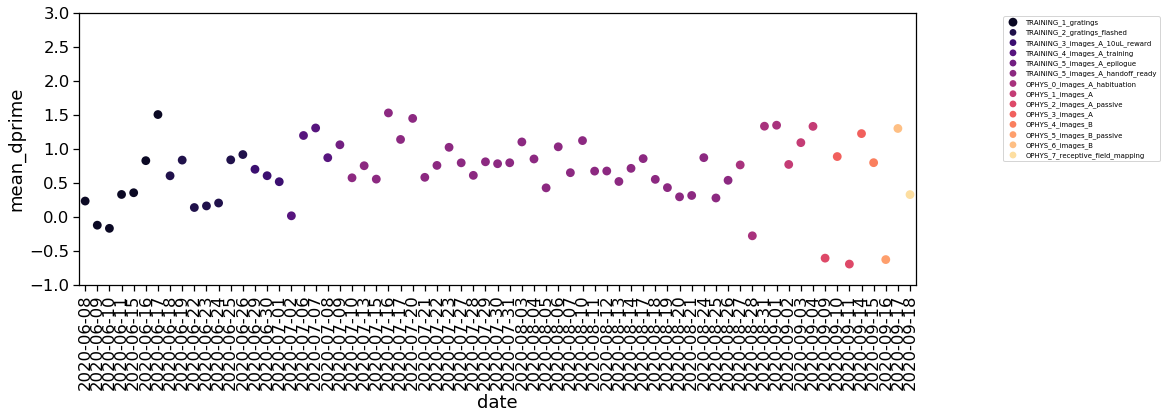

In [183]:
df = behavior_metrics_df[1:]

fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=df, x='date', y='mean_dprime', hue='session_type', 
              join=False, palette='magma', ax=ax)
ax.legend(bbox_to_anchor=(1.1,1), fontsize='x-small')
ax.set_xticklabels(labels=df.date.values, rotation=90);
ax.set_ylim(-1,3)